In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

raw_data = pd.read_csv('Raw_Data\data.csv')
wx1 = pd.read_csv('Raw_Data\wx1.csv')
wx2 = pd.read_csv('Raw_Data\wx2.csv')
wx3 = pd.read_csv('Raw_Data\wx3.csv')
wx4 = pd.read_csv('Raw_Data\wx4.csv')

raw_data['datetime'] = pd.to_datetime(raw_data['datetime'], format='%d/%m/%Y %H:%M',)
wx1['datetime'] = pd.to_datetime(wx1['datetime'], format='%d/%m/%Y %H:%M',)
wx2['datetime'] = pd.to_datetime(wx2['datetime'], format='%d/%m/%Y %H:%M',)
wx3['datetime'] = pd.to_datetime(wx3['datetime'], format='%d/%m/%Y %H:%M',)
wx4['datetime'] = pd.to_datetime(wx4['datetime'], format='%d/%m/%Y %H:%M',)

raw_data.set_index('datetime', inplace=True)
wx1.set_index('datetime', inplace=True)
wx2.set_index('datetime', inplace=True)
wx3.set_index('datetime', inplace=True)
wx4.set_index('datetime', inplace=True)

raw_data.sort_values("datetime", inplace=True)
wx1.sort_values("datetime", inplace=True)
wx2.sort_values("datetime", inplace=True)
wx3.sort_values("datetime", inplace=True)
wx4.sort_values("datetime", inplace=True)

In [139]:
print ('raw_data min/max date: %s / %s' % (raw_data.index.min().date(), raw_data.index.max().date()))
print ('wx1  min/max date: %s / %s' % ( wx1.index.min().date(),  wx1.index.max().date()))
print ('wx2  min/max date: %s / %s' % ( wx2.index.min().date(),  wx2.index.max().date()))
print ('wx3  min/max date: %s / %s' % ( wx3.index.min().date(),  wx3.index.max().date()))
print ('wx4  min/max date: %s / %s' % ( wx4.index.min().date(),  wx4.index.max().date()))

print ('')
print ('Number of days in raw_data: %d' % ((raw_data.index.max() - raw_data.index.min()).days + 1))
print ('Number of days in wx1:  %d' % (( wx1.index.max() -  wx1.index.min()).days + 1))
print ('Number of days in wx2:  %d' % (( wx2.index.max() -  wx2.index.min()).days + 1))
print ('Number of days in wx3:  %d' % (( wx3.index.max() -  wx3.index.min()).days + 1))
print ('Number of days in wx4:  %d' % (( wx4.index.max() -  wx4.index.min()).days + 1))

print ('')
print ('raw_data shape: %d rows' % raw_data.shape[0])
print ('wx1 shape: %d rows'  % wx1.shape[0])
print ('wx2 shape: %d rows'  % wx2.shape[0])
print ('wx3 shape: %d rows'  % wx3.shape[0])
print ('wx4 shape: %d rows'  % wx4.shape[0])

raw_data min/max date: 2014-07-24 / 2016-05-26
wx1  min/max date: 2014-01-01 / 2017-01-01
wx2  min/max date: 2014-01-01 / 2017-01-01
wx3  min/max date: 2014-01-01 / 2017-01-01
wx4  min/max date: 2016-05-30 / 2016-12-22

Number of days in raw_data: 673
Number of days in wx1:  1096
Number of days in wx2:  1096
Number of days in wx3:  1096
Number of days in wx4:  206

raw_data shape: 53761 rows
wx1 shape: 52115 rows
wx2 shape: 51996 rows
wx3 shape: 58922 rows
wx4 shape: 2240 rows


In [157]:
# just some sanity checks

# number of unique values for each dataset, just in case a number is defaulted to when there's anomalies
raw_data['Power'].value_counts()
wx4.Temperature.value_counts()
wx3.Temperature.value_counts()
wx2.Temperature.value_counts()
wx1.Temperature.value_counts()

# some exploration to make sure
raw_data_unique = raw_data['Power'].unique()
raw_data_unique_sorted = np.sort(raw_data_unique)
raw_data.isnull().sum(axis=0)
wx1.isnull().sum(axis=0)

Temperature    0
dtype: int64

In [158]:
# enumerating all the gaps in power data since we found that gaps are in timestamps, not data
raw_data_time_range = pd.date_range(start=raw_data.index.min(), end=raw_data.index.max(), freq=pd.Timedelta('15 minutes'))
all = pd.Series(data=raw_data_time_range)
mask = all.isin(raw_data.index.values)
for i in (all[~mask]):
    print(i)

2014-08-03 13:30:00
2014-08-03 13:45:00
2014-08-03 14:00:00
2014-08-03 14:15:00
2014-08-03 14:30:00
2014-08-03 14:45:00
2014-08-03 15:00:00
2014-08-03 15:15:00
2014-08-03 15:30:00
2014-08-03 15:45:00
2014-08-03 16:00:00
2014-08-03 16:15:00
2014-08-03 16:30:00
2014-08-03 16:45:00
2014-08-03 17:00:00
2014-08-03 17:15:00
2014-08-03 17:30:00
2014-08-03 17:45:00
2014-08-03 18:00:00
2014-08-03 18:15:00
2014-08-03 18:30:00
2014-08-03 18:45:00
2014-08-03 19:00:00
2014-08-03 19:15:00
2014-08-03 19:30:00
2014-08-03 19:45:00
2014-08-03 20:00:00
2014-08-03 20:15:00
2014-08-03 20:30:00
2014-08-03 20:45:00
2014-08-03 21:00:00
2014-08-03 21:15:00
2014-08-03 21:30:00
2014-08-03 21:45:00
2014-08-03 22:00:00
2014-08-03 22:15:00
2014-08-03 22:30:00
2014-08-03 22:45:00
2014-08-03 23:00:00
2014-08-03 23:15:00
2014-08-03 23:30:00
2014-08-03 23:45:00
2014-08-04 00:00:00
2014-08-04 00:15:00
2014-08-04 00:30:00
2014-08-04 00:45:00
2014-08-04 01:00:00
2014-08-04 01:15:00
2014-08-04 01:30:00
2014-08-04 01:45:00


2014-10-04 02:15:00
2014-10-04 02:30:00
2014-10-04 02:45:00
2014-10-04 03:00:00
2014-10-04 03:15:00
2014-10-04 03:30:00
2014-10-04 03:45:00
2014-10-04 04:00:00
2014-10-04 04:15:00
2014-10-04 04:30:00
2014-10-04 04:45:00
2014-10-04 05:00:00
2014-10-04 05:15:00
2014-10-04 05:30:00
2014-10-04 05:45:00
2014-10-04 06:00:00
2014-10-04 06:15:00
2014-10-04 06:30:00
2014-10-04 06:45:00
2014-10-04 07:00:00
2014-10-04 07:15:00
2014-10-04 07:30:00
2014-10-04 07:45:00
2014-10-04 08:00:00
2014-10-04 08:15:00
2014-10-04 08:30:00
2014-10-04 08:45:00
2014-10-04 09:00:00
2014-10-04 09:15:00
2014-10-04 09:30:00
2014-10-04 09:45:00
2014-10-04 10:00:00
2014-10-04 10:15:00
2014-10-04 10:30:00
2014-10-04 10:45:00
2014-10-04 11:00:00
2014-10-04 11:15:00
2014-10-04 11:30:00
2014-10-04 11:45:00
2014-10-04 12:00:00
2014-10-04 12:15:00
2014-10-04 12:30:00
2014-10-04 12:45:00
2014-10-04 13:00:00
2014-10-04 13:15:00
2014-10-04 13:30:00
2014-10-04 13:45:00
2014-10-04 14:00:00
2014-10-04 14:15:00
2014-10-04 14:30:00


2014-12-14 21:15:00
2014-12-14 21:30:00
2014-12-14 21:45:00
2014-12-14 22:00:00
2014-12-14 22:15:00
2014-12-14 22:30:00
2014-12-14 22:45:00
2014-12-14 23:00:00
2014-12-14 23:15:00
2014-12-14 23:30:00
2014-12-14 23:45:00
2014-12-15 00:00:00
2014-12-15 00:15:00
2014-12-15 00:30:00
2014-12-15 00:45:00
2014-12-15 01:00:00
2014-12-15 01:15:00
2014-12-15 01:30:00
2014-12-15 01:45:00
2014-12-15 02:00:00
2014-12-15 02:15:00
2014-12-15 02:30:00
2014-12-15 02:45:00
2014-12-15 03:00:00
2014-12-15 03:15:00
2014-12-15 03:30:00
2014-12-15 03:45:00
2014-12-15 04:00:00
2014-12-15 04:15:00
2014-12-15 04:30:00
2014-12-15 04:45:00
2014-12-15 05:00:00
2014-12-15 05:15:00
2014-12-15 05:30:00
2014-12-15 05:45:00
2014-12-15 06:00:00
2014-12-15 06:15:00
2014-12-15 06:30:00
2014-12-15 06:45:00
2014-12-15 07:00:00
2014-12-15 07:15:00
2014-12-15 07:30:00
2014-12-15 07:45:00
2014-12-15 08:00:00
2014-12-15 08:15:00
2014-12-15 08:30:00
2014-12-15 08:45:00
2014-12-15 09:00:00
2014-12-15 09:15:00
2014-12-15 09:30:00


2015-02-12 17:45:00
2015-02-12 18:00:00
2015-02-12 18:15:00
2015-02-12 18:30:00
2015-02-12 18:45:00
2015-02-12 19:00:00
2015-02-12 19:15:00
2015-02-12 19:30:00
2015-02-12 19:45:00
2015-02-12 20:00:00
2015-02-12 20:15:00
2015-02-12 20:30:00
2015-02-12 20:45:00
2015-02-12 21:00:00
2015-02-12 21:15:00
2015-02-12 21:30:00
2015-02-12 21:45:00
2015-02-12 22:00:00
2015-02-12 22:15:00
2015-02-12 22:30:00
2015-02-12 22:45:00
2015-02-12 23:00:00
2015-02-12 23:15:00
2015-02-12 23:30:00
2015-02-12 23:45:00
2015-02-13 00:00:00
2015-02-13 00:15:00
2015-02-13 00:30:00
2015-02-13 00:45:00
2015-02-13 01:00:00
2015-02-13 01:15:00
2015-02-13 01:30:00
2015-02-13 01:45:00
2015-02-13 02:00:00
2015-02-13 02:15:00
2015-02-13 02:30:00
2015-02-13 02:45:00
2015-02-13 03:00:00
2015-02-13 03:15:00
2015-02-13 03:30:00
2015-02-13 03:45:00
2015-02-13 04:00:00
2015-02-13 04:15:00
2015-02-13 04:30:00
2015-02-13 04:45:00
2015-02-13 05:00:00
2015-02-13 05:15:00
2015-02-13 05:30:00
2015-02-13 05:45:00
2015-02-13 06:00:00


2015-04-26 09:15:00
2015-04-26 09:30:00
2015-04-26 09:45:00
2015-04-26 10:00:00
2015-04-26 10:15:00
2015-04-26 10:30:00
2015-04-26 10:45:00
2015-04-26 11:00:00
2015-04-26 11:15:00
2015-04-26 11:30:00
2015-04-26 11:45:00
2015-04-26 12:00:00
2015-04-26 12:15:00
2015-04-26 12:30:00
2015-04-26 12:45:00
2015-04-26 13:00:00
2015-04-26 13:15:00
2015-04-26 13:30:00
2015-04-26 13:45:00
2015-04-26 14:00:00
2015-04-26 14:15:00
2015-04-26 14:30:00
2015-04-26 14:45:00
2015-04-26 15:00:00
2015-04-26 15:15:00
2015-04-26 15:30:00
2015-04-26 15:45:00
2015-04-26 16:00:00
2015-04-26 16:15:00
2015-04-26 16:30:00
2015-04-26 16:45:00
2015-04-26 17:00:00
2015-04-26 17:15:00
2015-04-26 17:30:00
2015-04-26 17:45:00
2015-04-26 18:00:00
2015-04-26 18:15:00
2015-04-26 18:30:00
2015-04-26 18:45:00
2015-04-26 19:00:00
2015-04-26 19:15:00
2015-04-26 19:30:00
2015-04-26 19:45:00
2015-04-26 20:00:00
2015-04-26 20:15:00
2015-04-26 20:30:00
2015-04-26 20:45:00
2015-04-26 21:00:00
2015-04-26 21:15:00
2015-04-26 21:30:00


2015-07-07 13:15:00
2015-07-07 13:30:00
2015-07-07 13:45:00
2015-07-07 14:00:00
2015-07-07 14:15:00
2015-07-07 14:30:00
2015-07-07 14:45:00
2015-07-07 15:00:00
2015-07-07 15:15:00
2015-07-07 15:30:00
2015-07-07 15:45:00
2015-07-07 16:00:00
2015-07-07 16:15:00
2015-07-07 16:30:00
2015-07-07 16:45:00
2015-07-07 17:00:00
2015-07-07 17:15:00
2015-07-07 17:30:00
2015-07-07 17:45:00
2015-07-07 18:00:00
2015-07-07 18:15:00
2015-07-07 18:30:00
2015-07-07 18:45:00
2015-07-07 19:00:00
2015-07-07 19:15:00
2015-07-07 19:30:00
2015-07-07 19:45:00
2015-07-07 20:00:00
2015-07-07 20:15:00
2015-07-07 20:30:00
2015-07-07 20:45:00
2015-07-07 21:00:00
2015-07-07 21:15:00
2015-07-07 21:30:00
2015-07-07 21:45:00
2015-07-07 22:00:00
2015-07-07 22:15:00
2015-07-07 22:30:00
2015-07-07 22:45:00
2015-07-07 23:00:00
2015-07-07 23:15:00
2015-07-07 23:30:00
2015-07-07 23:45:00
2015-07-08 00:00:00
2015-07-08 00:15:00
2015-07-08 00:30:00
2015-07-08 00:45:00
2015-07-08 01:00:00
2015-07-08 01:15:00
2015-07-08 01:30:00


2015-08-25 14:00:00
2015-08-25 14:15:00
2015-08-25 14:30:00
2015-08-25 14:45:00
2015-08-25 15:00:00
2015-08-25 15:15:00
2015-08-25 15:30:00
2015-08-25 15:45:00
2015-08-25 16:00:00
2015-08-25 16:15:00
2015-08-25 16:30:00
2015-08-25 16:45:00
2015-08-25 17:00:00
2015-08-25 17:15:00
2015-08-25 17:30:00
2015-08-25 17:45:00
2015-08-25 18:00:00
2015-08-25 18:15:00
2015-08-25 18:30:00
2015-08-25 18:45:00
2015-08-25 19:00:00
2015-08-25 19:15:00
2015-08-25 19:30:00
2015-08-25 19:45:00
2015-08-25 20:00:00
2015-08-25 20:15:00
2015-08-25 20:30:00
2015-08-25 20:45:00
2015-08-25 21:00:00
2015-08-25 21:15:00
2015-09-04 22:30:00
2015-09-04 22:45:00
2015-09-04 23:00:00
2015-09-04 23:15:00
2015-09-04 23:30:00
2015-09-04 23:45:00
2015-09-05 00:00:00
2015-09-05 00:15:00
2015-09-05 00:30:00
2015-09-05 00:45:00
2015-09-05 01:00:00
2015-09-05 01:15:00
2015-09-05 01:30:00
2015-09-05 01:45:00
2015-09-05 02:00:00
2015-09-05 02:15:00
2015-09-05 02:30:00
2015-09-05 02:45:00
2015-09-05 03:00:00
2015-09-05 03:15:00


2015-11-18 00:15:00
2015-11-18 00:30:00
2015-11-18 00:45:00
2015-11-18 01:00:00
2015-11-18 01:15:00
2015-11-18 01:30:00
2015-11-18 01:45:00
2015-11-18 02:00:00
2015-11-18 02:15:00
2015-11-18 02:30:00
2015-11-18 02:45:00
2015-11-18 03:00:00
2015-11-18 03:15:00
2015-11-18 03:30:00
2015-11-18 03:45:00
2015-11-18 04:00:00
2015-11-18 04:15:00
2015-11-28 05:30:00
2015-11-28 05:45:00
2015-11-28 06:00:00
2015-11-28 06:15:00
2015-11-28 06:30:00
2015-11-28 06:45:00
2015-11-28 07:00:00
2015-11-28 07:15:00
2015-11-28 07:30:00
2015-11-28 07:45:00
2015-11-28 08:00:00
2015-11-28 08:15:00
2015-11-28 08:30:00
2015-11-28 08:45:00
2015-11-28 09:00:00
2015-11-28 09:15:00
2015-11-28 09:30:00
2015-11-28 09:45:00
2015-11-28 10:00:00
2015-11-28 10:15:00
2015-11-28 10:30:00
2015-11-28 10:45:00
2015-11-28 11:00:00
2015-11-28 11:15:00
2015-11-28 11:30:00
2015-11-28 11:45:00
2015-11-28 12:00:00
2015-11-28 12:15:00
2015-11-28 12:30:00
2015-11-28 12:45:00
2015-11-28 13:00:00
2015-11-28 13:15:00
2015-11-28 13:30:00


2016-01-16 17:00:00
2016-01-16 17:15:00
2016-01-16 17:30:00
2016-01-16 17:45:00
2016-01-16 18:00:00
2016-01-16 18:15:00
2016-01-16 18:30:00
2016-01-16 18:45:00
2016-01-16 19:00:00
2016-01-16 19:15:00
2016-01-16 19:30:00
2016-01-16 19:45:00
2016-01-16 20:00:00
2016-01-16 20:15:00
2016-01-16 20:30:00
2016-01-16 20:45:00
2016-01-16 21:00:00
2016-01-16 21:15:00
2016-01-16 21:30:00
2016-01-16 21:45:00
2016-01-16 22:00:00
2016-01-16 22:15:00
2016-01-16 22:30:00
2016-01-16 22:45:00
2016-01-16 23:00:00
2016-01-16 23:15:00
2016-01-16 23:30:00
2016-01-16 23:45:00
2016-01-17 00:00:00
2016-01-17 00:15:00
2016-01-17 00:30:00
2016-01-17 00:45:00
2016-01-17 01:00:00
2016-01-17 01:15:00
2016-01-17 01:30:00
2016-01-17 01:45:00
2016-01-17 02:00:00
2016-01-17 02:15:00
2016-01-17 02:30:00
2016-01-17 02:45:00
2016-01-17 03:00:00
2016-01-17 03:15:00
2016-01-17 03:30:00
2016-01-17 03:45:00
2016-01-17 04:00:00
2016-01-17 04:15:00
2016-01-17 04:30:00
2016-01-17 04:45:00
2016-01-17 05:00:00
2016-01-17 05:15:00


2016-03-17 13:30:00
2016-03-17 13:45:00
2016-03-17 14:00:00
2016-03-17 14:15:00
2016-03-27 02:00:00
2016-03-27 02:15:00
2016-03-27 02:30:00
2016-03-27 02:45:00
2016-03-27 15:30:00
2016-03-27 15:45:00
2016-03-27 16:00:00
2016-03-27 16:15:00
2016-03-27 16:30:00
2016-03-27 16:45:00
2016-03-27 17:00:00
2016-03-27 17:15:00
2016-03-27 17:30:00
2016-03-27 17:45:00
2016-03-27 18:00:00
2016-03-27 18:15:00
2016-03-27 18:30:00
2016-03-27 18:45:00
2016-03-27 19:00:00
2016-03-27 19:15:00
2016-03-27 19:30:00
2016-03-27 19:45:00
2016-03-27 20:00:00
2016-03-27 20:15:00
2016-03-27 20:30:00
2016-03-27 20:45:00
2016-03-27 21:00:00
2016-03-27 21:15:00
2016-03-27 21:30:00
2016-03-27 21:45:00
2016-03-27 22:00:00
2016-03-27 22:15:00
2016-03-27 22:30:00
2016-03-27 22:45:00
2016-03-27 23:00:00
2016-03-27 23:15:00
2016-03-27 23:30:00
2016-03-27 23:45:00
2016-03-28 00:00:00
2016-03-28 00:15:00
2016-03-28 00:30:00
2016-03-28 00:45:00
2016-03-28 01:00:00
2016-03-28 01:15:00
2016-03-28 01:30:00
2016-03-28 01:45:00


In [150]:
start_date = raw_data.index.min()
end_date = raw_data.index.max()

def listtimegaps(dataframe, start_date, end_date, timegap):
    '''
    list all time gaps greater than timegap and their corresponding entries, assuming dataframe is indexed by datetime
    '''
    mask = (dataframe.index > start_date) & (dataframe.index <= end_date)
    df = dataframe.loc[mask]

    deltas = (pd.Series(df.index.values).diff()[1:])
    gaps = deltas[deltas > pd.Timedelta(timegap)]

    print('Length of timegaps')
    print(gaps)
    print('')
    print('The total number of such timegaps are '+str(len(gaps)))
    print('')
#     print("We list down the time when these gaps occur")
#     print(df.iloc[gaps.index-1])
#     print(df.iloc[gaps.index])

x = "4 hour"    
listtimegaps(wx1, start_date, end_date, x)

listtimegaps(wx2, start_date, end_date, x)

listtimegaps(wx3, start_date, end_date, x)


Length of timegaps
578     07:45:00
610     10:45:00
774     07:45:00
2215    05:45:00
2576    05:30:00
6636    05:00:00
7378    05:00:00
17701   06:45:00
18950   06:00:00
18987   06:00:00
19372   06:00:00
21092   05:00:00
23458   05:00:00
24725   05:00:00
24912   05:00:00
25146   05:00:00
25565   05:00:00
26710   05:00:00
29981   05:45:00
dtype: timedelta64[ns]

The total number of such timegaps are 19

Length of timegaps
602     07:00:00
638     06:55:00
12924   05:55:00
18437   06:55:00
20215   04:55:00
27314   04:55:00
dtype: timedelta64[ns]

The total number of such timegaps are 6

Length of timegaps
683     07:50:00
723     07:30:00
20744   06:30:00
30772   05:00:00
dtype: timedelta64[ns]

The total number of such timegaps are 4



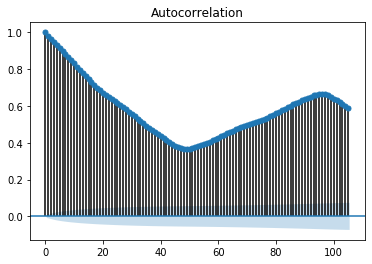

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot

# autocorrelation plot over about 1 day (96 time steps), just to confirm correlation over a day
plot_acf(raw_data['Power'], lags=105);


(0, 880)

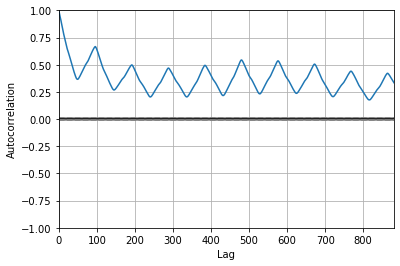

In [336]:
# autocorrelation plot over about 1 week (672 time steps), just to confirm correlation over a week

ax = autocorrelation_plot(raw_data['Power'])
ax.set_xlim([0, 680])

Power
(0, 10]             2
(10, 20]            4
(20, 30]            5
(30, 40]           15
(40, 50]           27
(50, 60]           23
(60, 70]           52
(70, 80]           50
(80, 90]           53
(90, 100]          86
(100, 1000]     27619
(1000, 2000]    10753
(2000, 3000]     4870
(3000, 4000]     3853
(4000, 5000]     3064
(5000, 6000]     2725
(6000, 7000]      543
(7000, 8000]       17
(8000, 9000]        0
Name: Power, dtype: int64


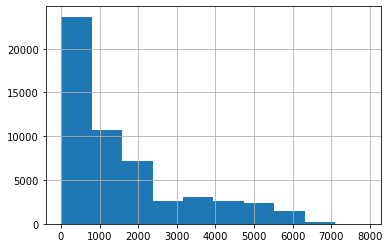

In [162]:
# just a rough gauge of distribution
ranges = [0,10,20,30,40,50,60,70,80,90,100,1000,2000,3000,4000,5000,6000,7000,8000,9000]
print(raw_data['Power'].groupby(pd.cut(raw_data['Power'], ranges)).count())
raw_data['Power'].hist()

(0.0, 2000.0)

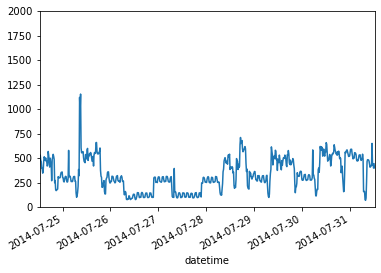

In [172]:
# just some testing over different periods
qx = raw_data['Power'].plot()
qx.set_xlim(raw_data.index.min(), raw_data.index.min()+pd.Timedelta('7 Days'))
qx.set_ylim(0,2000)

                     Temperature
datetime                        
2014-10-20 22:55:00         19.0
2014-10-20 23:00:00         19.0
2014-10-20 23:55:00         19.0
2014-10-21 00:00:00         18.6
2014-10-21 00:55:00         18.0
2014-10-21 01:00:00         18.4
2014-10-21 01:55:00         18.0
2014-10-21 02:00:00         18.4
2014-10-21 02:55:00         18.0
2014-10-21 03:00:00         18.4
2014-10-21 03:55:00         18.0
2014-10-21 04:00:00         18.4
2014-10-21 04:55:00         18.0
2014-10-21 05:00:00         18.4
2014-10-21 05:55:00         18.0
2014-10-21 06:00:00         18.4
2014-10-21 06:55:00         18.0
2014-10-21 07:00:00         18.4
2014-10-21 07:55:00         18.0
2014-10-21 08:00:00         18.2
2014-10-21 08:55:00         19.0
2014-10-21 09:00:00         18.6
2014-10-21 09:55:00         19.0
2014-10-21 10:00:00         18.6
2014-10-21 10:55:00         19.0
2014-10-21 11:00:00         19.0
2014-10-21 11:55:00         21.0
2014-10-21 12:00:00         20.8
2014-10-21

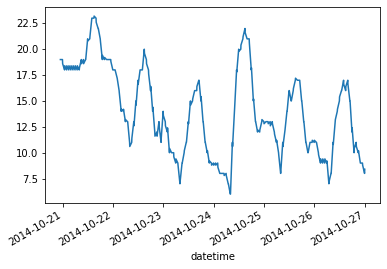

In [173]:
# alternative method to plot stuff and extract data
start_date = '20-10-2014 22:00'
end_date = '27-10-2014 00:00'
mask = (wx2.index > start_date) & (wx2.index <= end_date)
df = wx2.loc[mask]
df['Temperature'].plot()
print(df.to_string())

In [2]:
# trying some interpolation 

q = pd.merge_asof(raw_data, wx1, on="datetime", direction = "nearest", tolerance = pd.Timedelta('5 minutes'))
q1 = pd.merge_asof(q, wx2, on="datetime", direction = "nearest",  tolerance = pd.Timedelta('5 minutes'))
q2 = pd.merge_asof(q1, wx3, on="datetime", direction = "nearest",  tolerance = pd.Timedelta('5 minutes'))

data_datetimeindex = pd.date_range(start=raw_data.index.min().to_pydatetime(), end = raw_data.index.max().to_pydatetime(),freq=pd.Timedelta('15 minutes'))

index0 = data_datetimeindex.union(wx1.index)
df_reindexed = wx1.reindex(index0)                  
wx1_interpolated = df_reindexed.interpolate(method='spline', order=3)

index1 = data_datetimeindex.union(wx2.index)
df_reindexed = wx2.reindex(index1)                  
wx2_interpolated = df_reindexed.interpolate(method='spline', order=3)

index2 = data_datetimeindex.union(wx3.index)
df_reindexed = wx3.reindex(index2)                  
wx3_interpolated = df_reindexed.interpolate(method='spline', order=3)

wx1_interpolated.index.name = 'datetime'
wx2_interpolated.index.name = 'datetime'
wx3_interpolated.index.name = 'datetime'

q3 = pd.merge_asof(q2, wx1_interpolated, on="datetime" , direction = "nearest",  tolerance = pd.Timedelta('5 minutes'))
q4 = pd.merge_asof(q3, wx2_interpolated, on="datetime", direction = "nearest",  tolerance = pd.Timedelta('5 minutes'))
q5 = pd.merge_asof(q4, wx3_interpolated, on="datetime", direction = "nearest",  tolerance = pd.Timedelta('5 minutes'))

q5.columns = ['datetime', 'Power', 'Temperature_wx1', 'Temperature_wx2', 'Temperature_wx3',
       'Temperature_wx1interpolated', 'Temperature_wx2interpolated', 'Temperature_wx3interpolated']

x= 0.999
y= 0.99
z= 0.9
a=0.111
b=0.11
c= 0.1

print((df['Temperature_wx1']*x + df['Temperature_wx2']*y + df['Temperature_wx3']*z + df['Temperature_wx1interpolated']*a + df['Temperature_wx2interpolated']*b + df['Temperature_wx3interpolated']*c)/(df['Temperature_wx1'].astype(bool).astype(int)*x + df['Temperature_wx2'].astype(bool).astype(int)*y + df['Temperature_wx3'].astype(bool).astype(int)*z + a + b + c))

In [249]:
# sanity check functions to check how many nans in dataframe

def row_nan_sums(df):
    sums = []
    for row in df.values:
        sum = 0
        for el in row:
            if el != el: # np.nan is never equal to itself. This is "hacky", but complete.
                sum+=1
        sums.append(sum)
    return sums
def query_k_plus_sums(df, k):
    sums = row_nan_sums(df)
    indices = []
    i = 0
    for sum in sums:
        if (sum >= k):
            indices.append(i)
        i += 1
    return indices

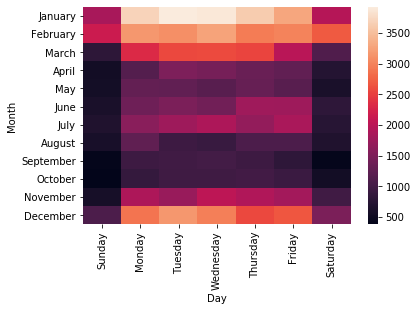

In [126]:
raw_data["Day"] = raw_data.index.to_series().apply(lambda x: x.strftime("%A"))
raw_data["Month"] = raw_data.index.to_series().apply(lambda x: x.strftime("%B"))
pt = raw_data.pivot_table(index="Month",columns="Day",values="Power", aggfunc="mean")

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
pt = pt.reindex(months, columns = days)

sns.heatmap(pt)

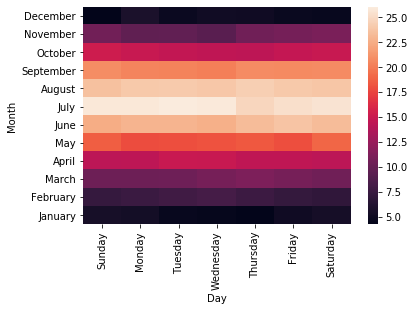

In [119]:
wx1["Day"] = wx1.index.to_series().apply(lambda x: x.strftime("%A"))
wx1["Month"] = wx1.index.to_series().apply(lambda x: x.strftime("%B"))
pt = wx1.pivot_table(index="Month",columns="Day",values="Temperature", aggfunc="mean")

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
months = months[-1::-1]
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
pt = pt.reindex(months, columns = days)

sns.heatmap(pt, cmap="YlGnBu")

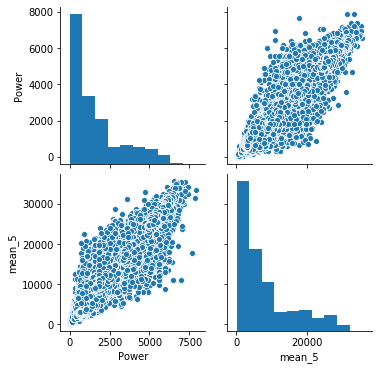

In [110]:
raw_data['mean_5'] = raw_data['Power'].rolling(5).sum()
sns.pairplot(raw_data[6::])

In [109]:
q5['Temperature_x'].corr(q5['Temperature_y'])
q5['Temperature_x'].corr(q5['Temperature_y'])

0.9911490092573977

Day,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Month,,,,,,,
January,930.098112,2529.759684,2716.862845,3515.470638,3056.927467,3184.693530,1523.210865
February,2703.953115,3903.722647,3930.178109,4133.261538,3561.804268,3169.160986,2614.280495
March,806.663726,2519.928902,2591.121216,2554.709265,2561.678258,2135.931462,1490.255483
April,533.196601,1114.310957,1730.781298,1390.529705,1349.812374,1248.048292,744.986560
May,587.508436,1213.557661,1178.086363,1194.876776,1309.488710,1146.548734,644.738799
June,618.734503,1387.039556,1495.928994,1411.636541,1784.465962,1776.799421,812.042456
July,841.608859,2030.042978,2245.232411,2233.145890,2087.136779,2229.492285,902.474571
August,926.581205,1853.776352,1570.877639,1483.235346,1667.945435,1787.829328,1040.412397
September,575.352359,1483.281106,1532.131254,1489.013520,1587.272263,1283.005331,615.021031


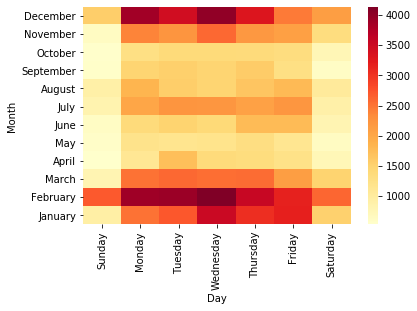

In [159]:
pt = df.pivot_table(index="Month",columns="Day",values="Power", aggfunc="mean")

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
pt = pt.reindex(months, columns = days)
display(pt)
months = months[-1::-1]
pt = pt.reindex(months, columns = days)
sns.heatmap(pt, cmap = "YlOrRd")

In [175]:
# trying out some holidays stuff
holidays = ['1/1/2014','1/1/2015','1/1/2016','6/1/2014','6/1/2015','6/1/2016','21/4/2014','6/4/2015','28/3/2016','25/4/2014','25/4/2015','25/4/2016','1/5/2014','1/5/2015','1/5/2016','2/6/2014','2/6/2015','2/6/2016','15/8/2014','15/8/2015','15/8/2016','1/11/2014','1/11/2015','1/11/2016','8/12/2014','8/12/2015','8/12/2016','25/12/2014','25/12/2015','25/12/2016','26/12/2014','26/12/2015','26/12/2016']
h=[]
for i in holidays:
    h.append(pd.to_datetime(i))

In [62]:
q5['day_name']=q5['datetime'].dt.day_name()
q5['hour']=q5['datetime'].dt.hour

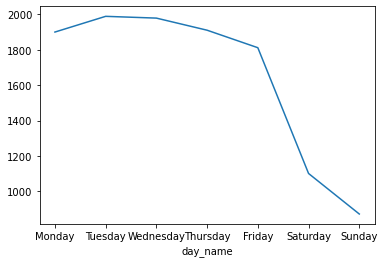

In [72]:
plotdays = q5.groupby(by= q5['day_name']).mean()['Power']
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
plotdays = plotdays.reindex(days)
plotdays.plot()

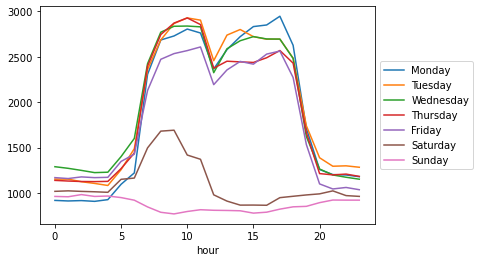

In [98]:
plotdays = q5.groupby(by=['hour','day_name']).mean()['Power'].unstack()
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
plotdays = plotdays.reindex(columns=days)
ax = plotdays.plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [99]:
q5['isEaster'] = q5['datetime'].dt.day_name()

,datetime,Power,Temperature_wx1,Temperature_wx2,Temperature_wx3,Temperature_wx1interpolated,Temperature_wx2interpolated,Temperature_wx3interpolated,dayofweek,day_name,hour
0,2014-07-24 12:30:00,499.247996,NaN,NaN,NaN,23.039524,22.527288,21.145506,3,Thursday,12
1,2014-07-24 12:45:00,530.257188,21.0,NaN,19.0,21.000000,22.570720,21.175818,3,Thursday,12
2,2014-07-24 13:00:00,477.541561,NaN,21.8,NaN,23.122336,21.800000,21.207221,3,Thursday,13
3,2014-07-24 13:15:00,463.587425,22.0,NaN,19.0,22.000000,22.649435,21.239466,3,Thursday,13
4,2014-07-24 13:30:00,395.367202,NaN,NaN,NaN,23.173906,22.684082,21.272305,3,Thursday,13
...,...,...,...,...,...,...,...,...,...,...,...
53756,2016-05-26 19:15:00,1821.790047,24.0,NaN,22.0,24.000000,24.871887,21.522573,3,Thursday,19
53757,2016-05-26 19:30:00,1581.468807,NaN,NaN,NaN,23.468268,24.626758,21.392578,3,Thursday,19
53758,2016-05-26 19:45:00,784.532565,24.0,NaN,22.0,24.000000,24.367863,21.258787,3,Thursday,19
53759,2016-05-26 20:00:00,541.110405,23.8,24.0,21.7,23.800000,24.000000,21.700000,3,Thursday,20


In [120]:
from pandas.tseries.holiday import Holiday, AbstractHolidayCalendar
from pandas.tseries.offsets import Day, Easter

import pandas as pd
import datetime as dt

class ItalyHolidays(AbstractHolidayCalendar):
    rules = [Holiday('Christmas',month=12,day=25),
             Holiday('St. Stephens Day',month=12,day=26),
            Holiday('Epiphany',month=1,day=6),
             Holiday('Liberation Day',month=4,day=25),
             Holiday('Labour Day',month=5,day=1),
             Holiday('Republic Day',month=6,day=2),
             Holiday('Ferragosto',month=8,day=15),
             Holiday('All Saints Day',month=11,day=1),
             Holiday('Feast of the Immaculate Conception',month=12,day=8),
            Holiday('New Year',month=1,day=1),
            Holiday("Easter Monday", month=1, day=1, offset=[Easter(), Day(1)]),
            Holiday("Easter", month=1, day=1, offset=Easter()),             
            ]

In [127]:
holidaydates= ItalyHolidays().holidays(q5['datetime'].min(), q5['datetime'].max())

In [134]:
q5['Holiday'] = q5['datetime'].dt.date.astype('datetime64').isin(holidays)
q5

,datetime,Power,Temperature_wx1,Temperature_wx2,Temperature_wx3,Temperature_wx1interpolated,Temperature_wx2interpolated,Temperature_wx3interpolated,dayofweek,day_name,hour,Holiday
0,2014-07-24 12:30:00,499.247996,NaN,NaN,NaN,23.039524,22.527288,21.145506,3,Thursday,12,False
1,2014-07-24 12:45:00,530.257188,21.0,NaN,19.0,21.000000,22.570720,21.175818,3,Thursday,12,False
2,2014-07-24 13:00:00,477.541561,NaN,21.8,NaN,23.122336,21.800000,21.207221,3,Thursday,13,False
3,2014-07-24 13:15:00,463.587425,22.0,NaN,19.0,22.000000,22.649435,21.239466,3,Thursday,13,False
4,2014-07-24 13:30:00,395.367202,NaN,NaN,NaN,23.173906,22.684082,21.272305,3,Thursday,13,False
...,...,...,...,...,...,...,...,...,...,...,...,...
53756,2016-05-26 19:15:00,1821.790047,24.0,NaN,22.0,24.000000,24.871887,21.522573,3,Thursday,19,False
53757,2016-05-26 19:30:00,1581.468807,NaN,NaN,NaN,23.468268,24.626758,21.392578,3,Thursday,19,False
53758,2016-05-26 19:45:00,784.532565,24.0,NaN,22.0,24.000000,24.367863,21.258787,3,Thursday,19,False
53759,2016-05-26 20:00:00,541.110405,23.8,24.0,21.7,23.800000,24.000000,21.700000,3,Thursday,20,False


In [135]:
start_date = '30-12-2014 22:00'
end_date = '01-01-2015 22:00'
mask = (q5['datetime'] > start_date) & (q5['datetime'] <= end_date)
df = q5.loc[mask]

df

,datetime,Power,Temperature_wx1,Temperature_wx2,Temperature_wx3,Temperature_wx1interpolated,Temperature_wx2interpolated,Temperature_wx3interpolated,dayofweek,day_name,hour,Holiday
12717,2014-12-30 22:15:00,3102.469688,0.0,NaN,1.0,0.000000,-1.123087,1.294226,1,Tuesday,22,False
12718,2014-12-30 22:30:00,3364.497363,NaN,NaN,NaN,0.018420,-1.192001,1.267887,1,Tuesday,22,False
12719,2014-12-30 22:45:00,2266.771956,0.0,NaN,1.0,0.000000,-1.258075,1.240726,1,Tuesday,22,False
12720,2014-12-30 23:00:00,3294.726680,NaN,-1.4,NaN,-0.073697,-1.400000,1.212776,1,Tuesday,23,False
12721,2014-12-30 23:15:00,3300.928519,NaN,NaN,0.0,-0.121032,-1.380562,1.184067,1,Tuesday,23,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12904,2015-01-01 21:00:00,497.697536,NaN,-1.0,NaN,0.005550,-1.000000,1.890546,3,Thursday,21,True
12905,2015-01-01 21:15:00,468.238804,-1.0,NaN,1.0,-1.000000,0.590599,1.725391,3,Thursday,21,True
12906,2015-01-01 21:30:00,468.238804,NaN,NaN,NaN,-0.439126,0.362985,1.558322,3,Thursday,21,True
12907,2015-01-01 21:45:00,465.137884,-1.0,NaN,1.0,-1.000000,0.133705,1.390063,3,Thursday,21,True


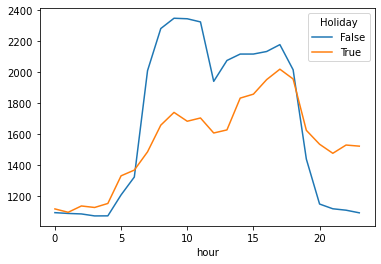

In [136]:
q5.groupby(by=['hour','Holiday']).mean()['Power'].unstack().plot()
